<a href="https://colab.research.google.com/github/gitsland/Web-Scrapping/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Here -- Web scrapping is done for an URL by structuring the data in a pandas-dataframe and applying functions and analysis, as well as appropriate visualizations**

In [202]:
pip install requests beautifulsoup4 requests-html

 importing some libraries we may use

In [203]:
import pandas as pd
from urllib.parse import urlparse
import numpy as np
import nltk.data
from requests_html import HTMLSession

The URL is stored which can be used in some functions. In this way- we can scrap from any web page links only by changing URL here

In [204]:
import requests
from bs4 import BeautifulSoup

# Make the HTTP request
url = 'https://www.theglobeandmail.com/business/commentary/article-instead-of-fearing-a-recession-canada-must-embrace-the-next-one-its-an/'



The URL for web scraping is taken as input to return the main text. This function can be used for scraping any web pages.

In [205]:
def get_and_parse(url):
  response = requests.get(url)

# Parse the HTML content with Beautiful Soup
  soup = BeautifulSoup(response.content, 'html.parser')

# Remove unwanted elements (script, style, comments, etc.)
  for element in soup(['script', 'style', 'comment']):
      element.extract()

# Extract the visible text
  text = soup.get_text(separator=' ')
  return text

print(get_and_parse(url))

#   https://www.theglobeandmail.com/business/commentary/article-instead-of-fearing-a-recession-canada-must-embrace-the-next-one-its-an/

Opinion: Instead of fearing a recession, Canada must embrace the next one – it’s an opportunity - The Globe and Mail 
 
 Skip to main content AdChoices Canada World Business Investing Watchlist Personal Finance Opinion Politics Sports Life Arts Drive Real Estate Podcasts opinion Instead of fearing a recession, Canada must embrace the next one – it’s an opportunity John Rapley Special to The Globe and Mail Published  July 28, 2023 Open this photo in gallery: Mt. Rundle rises behind homes being constructed in Canmore, Alta., on April 24. Jeff McIntosh/The Canadian Press Share Bookmark Please log in to bookmark this story. Log In Create Free Account John Rapley is a political economist at the University of Cambridge and managing director of Seaford Macro. Economists are debating whether the Bank of Canada’s interest rate hikes have gone too far and might now cause a recession. But it may be the wrong debate. Rather than ask if the economy is in recession, we should ask how we’re going to 

In [206]:
def parse_elements(url,element):
    session = HTMLSession()
    r = session.get(url)
    elements = r.html.find(element)
    return elements

Parse the paragraph elements and anchor elements from the url provided

In [207]:
paragraphs = parse_elements(url, 'p')

links = parse_elements(url, 'a')

Detects where the author is talking about Recession , Opportunity, Economy , Country or Policy
    

In [208]:


def topic_detection(sentence):
    Recession_words = ('interest rate', 'recession', 'low-growth', 'inflation', 'crisis', )
    Opportunity_words = ('Instead', 'developing', 'opportunity','openness', 'talent','wage growth','fund','favourably','proposed','confidence' )
    Economy_Words = ('economy','money', 'tax cut','debts','income', 'Bank','fiscal','monetory','expenditure', 'financial')
    Country_Names = ('Canada', 'U.S.', 'Britain', 'Norway', 'Russia', 'Japan')
    Policy_words = ('policy', 'policies')



    Recession = any(sentence.count(i) > 0 for i in Recession_words)
    Opportunity = any(sentence.count(i) > 0 for i in Opportunity_words)
    Economy = any(sentence.count(i) > 0 for i in Economy_Words)
    Country = any(sentence.count(i) > 0 for i in Country_Names)
    Policy = any(sentence.count(i) > 0 for i in Policy_words)
    topics = []

    if Recession == True:
        topics.append("Recession")
    if Opportunity == True:
        topics.append("Opportunity")
    if Economy == True:
        topics.append("Economy")
    if Country == True:
        topics.append("Country")
    if Policy == True:
        topics.append("Policy")
    return topics


Prints out which topics are discussed in each paragraph

In [209]:
for p in range(2, len(paragraphs)):
    if len(paragraphs[p].text) > 50:
      print((paragraphs[p].text))
      print(f"TALKS ABOUT: {topic_detection(paragraphs[p].text)}\n")

Economists are debating whether the Bank of Canada’s interest rate hikes have gone too far and might now cause a recession. But it may be the wrong debate. Rather than ask if the economy is in recession, we should ask how we’re going to react to the next recession.
TALKS ABOUT: ['Recession', 'Economy', 'Country']

That’s because recessions are inevitable in economic cycles. If not now, we will have to confront one some day. When that day comes, we should not simply jolt the economy back to life as if with a defibrillator, as we’ve been doing for years with our single-minded focus of lowering interest rates. Instead, we should treat recessions as opportunities to fix the specific underlying economic problems that brought us there, and thereby make the economy stronger in the long run.
TALKS ABOUT: ['Recession', 'Opportunity', 'Economy']

There’s a problem with what we’ve been doing. In recent decades, the conventional approach to fighting recessions has been to simply flood the economy 

Creates a dictionary with topics discussed in the paragraphs

In [210]:
#dictionary that has two lists, one for the paragraphs, and one for topics covered by those paragraphs

p_dictionary = {}
p_list = []
topic_list = []
for p in range(2, len(paragraphs)):
    if len(paragraphs[p].text) > 50:
      p_list.append(paragraphs[p].text)
      topic_list.append(topic_detection(paragraphs[p].text))
p_dictionary['Paragraphs'] = p_list
p_dictionary['Topics'] = topic_list

p_dictionary['Topics']

[['Recession', 'Economy', 'Country'],
 ['Recession', 'Opportunity', 'Economy'],
 ['Recession', 'Economy'],
 ['Recession', 'Economy'],
 ['Recession', 'Opportunity', 'Policy'],
 ['Recession', 'Opportunity', 'Economy', 'Country'],
 ['Opportunity', 'Economy', 'Country'],
 ['Recession', 'Country'],
 ['Economy', 'Policy'],
 ['Recession', 'Economy', 'Country', 'Policy'],
 ['Country'],
 ['Economy', 'Country'],
 [],
 ['Opportunity', 'Country'],
 ['Opportunity', 'Country'],
 ['Country'],
 ['Recession', 'Economy', 'Country'],
 ['Policy'],
 ['Opportunity', 'Economy'],
 ['Opportunity', 'Economy'],
 ['Opportunity', 'Economy'],
 ['Opportunity', 'Economy', 'Country'],
 ['Recession', 'Opportunity', 'Economy', 'Country'],
 ['Economy'],
 ['Country'],
 ['Country'],
 ['Recession', 'Economy', 'Country'],
 ['Recession', 'Economy', 'Country'],
 ['Opportunity', 'Policy'],
 [],
 []]

A chart is created showing paragraphs,which topics and how many topics are there in each paragraph

In [212]:
#A Data frame is required to represent the chart
news_df = pd.DataFrame(p_dictionary)

news_df['Topic Count'] = news_df['Topics'].apply(len)
news_df.head(10)

,Paragraphs,Topics,Topic Count
0,Economists are debating whether the Bank of Ca...,"[Recession, Economy, Country]",3
1,That’s because recessions are inevitable in ec...,"[Recession, Opportunity, Economy]",3
2,There’s a problem with what we’ve been doing. ...,"[Recession, Economy]",2
3,Governments have stepped back and largely left...,"[Recession, Economy]",2
4,"Instead, as a growing body of economic thought...","[Recession, Opportunity, Policy]",3
5,Canada illustrates this all too well. This cou...,"[Recession, Opportunity, Economy, Country]",4
6,Instead of unleashing a burst of new productiv...,"[Opportunity, Economy, Country]",3
7,Had governments in Canada engaged in a major p...,"[Recession, Country]",2
8,"If we want to get serious about our economy, t...","[Economy, Policy]",2
9,One can debate the details of the current U.S....,"[Recession, Economy, Country, Policy]",4


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Topic Count'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['Topic Count'], **{})
chart



which topics are discussed total how many times, that is determined to plot a bar graph

In [214]:
news_df['Recession'] = news_df['Topics'].apply(lambda x:1 if 'Recession' in x else 0)
news_df['Opportunity'] = news_df['Topics'].apply(lambda x:1 if 'Opportunity' in x else 0)
news_df['Economy'] = news_df['Topics'].apply(lambda x:1 if 'Economy' in x else 0)
news_df['Country'] = news_df['Topics'].apply(lambda x:1 if 'Country' in x else 0)
news_df['Policy'] = news_df['Topics'].apply(lambda x:1 if 'Policy' in x else 0)

topic_counts = [news_df['Recession'].sum(), news_df['Opportunity'].sum(), news_df['Economy'].sum(), news_df['Country'].sum(), news_df['Policy'].sum()]
topic_labels = ['Recession','Opportunity', 'Economy', 'Country', 'Policy']


topic_labels are plotted on X axis as Topic names and topic_counts are plotted on Y axis as Total Topic Counts

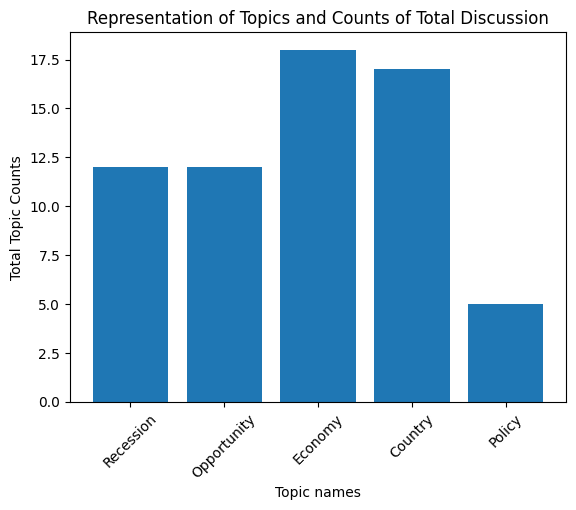

In [219]:
import matplotlib.pyplot as plt

# Plotting the bar graph
plt.bar(topic_labels, topic_counts)

# Customize the plot
plt.xlabel('Topic names')
plt.ylabel('Total Topic Counts')
plt.title('Representation of Topics and Counts of Total Discussion')
plt.xticks(rotation=45)

# Show the plot
plt.show()

From the graph above, it is very clear that this news article mostly discussed about economy and country to analyze recission and opportunities.

A Sentiment detection function is used which is a rules based approach that flags sentiment soley based on whether or not key words have been found using some comprehensions and optimized if/else logic to return the right sentiment

In [220]:
def sentiment_detection(sentence):
    positive_words = ('well', 'enjoy','strength', 'positive', 'efficiently', 'fix', 'significant', 'achieve','capabilities','progress','stronger')
    negative_words = ('cheap', 'problem', 'scarcities', 'single-minded', 'price bubble','questionable', 'stepped back', 'critical','crisis','weak')

    positive = any(sentence.count(i) > 0 for i in positive_words)
    negative = any(sentence.count(i) > 0 for i in negative_words)

    if positive == negative == False:
        return "neutral"
    elif positive != negative:
        return "positive" if positive else "negative"
    else:
        return "mixed"

Prints out a sentiment analysis after every paragraph is printed with names of topics discussed and how many times each are discussed. Using this chart graphical representaions can be found for different types of distributions

In [221]:
news_df['Sentiment'] = news_df['Paragraphs'].apply(sentiment_detection)
news_df.head(20)

,Paragraphs,Topics,Topic Count,Recession,Opportunity,Economy,Country,Policy,Sentiment
0,Economists are debating whether the Bank of Ca...,"[Recession, Economy, Country]",3,1,0,1,1,0,neutral
1,That’s because recessions are inevitable in ec...,"[Recession, Opportunity, Economy]",3,1,1,1,0,0,mixed
2,There’s a problem with what we’ve been doing. ...,"[Recession, Economy]",2,1,0,1,0,0,negative
3,Governments have stepped back and largely left...,"[Recession, Economy]",2,1,0,1,0,0,negative
4,"Instead, as a growing body of economic thought...","[Recession, Opportunity, Policy]",3,1,1,0,0,1,negative
5,Canada illustrates this all too well. This cou...,"[Recession, Opportunity, Economy, Country]",4,1,1,1,1,0,mixed
6,Instead of unleashing a burst of new productiv...,"[Opportunity, Economy, Country]",3,0,1,1,1,0,negative
7,Had governments in Canada engaged in a major p...,"[Recession, Country]",2,1,0,0,1,0,neutral
8,"If we want to get serious about our economy, t...","[Economy, Policy]",2,0,0,1,0,1,neutral
9,One can debate the details of the current U.S....,"[Recession, Economy, Country, Policy]",4,1,0,1,1,1,neutral


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Topic Count'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['Recession'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_4, *['Opportunity'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_5, *['Economy'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['Topic Count'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['Recession'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_8, *['Opportunity'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_9, *['Economy'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_10, *['Sentiment'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_11, *[[['Topic Count', 'Recession'], ['Recession', 'Opportunity'], ['Opportunity', 'Economy'], ['Economy', 'Country']]], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_12, *['Topic Count', 'Sentiment'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_13, *['Recession', 'Sentiment'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_14, *['Opportunity', 'Sentiment'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_15, *['Economy', 'Sentiment'], **{'inner': 'stick'})
chart

Finds the total numbers of neutral/ positive/ mixed/negative paragraphs in the article- which shows this news article is mostly neutral and positive

In [223]:
category_amount = news_df['Sentiment'].value_counts()
print(category_amount)
print(list(category_amount))
print(list(category_amount.keys()))

neutral     14
positive     8
mixed        5
negative     4
Name: Sentiment, dtype: int64
[14, 8, 5, 4]
['neutral', 'positive', 'mixed', 'negative']
